<a href="https://colab.research.google.com/github/Sedinei/DSWP/blob/master/NB_trabalhado/Desafio_Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clonando a biblioteca ds_toolbox

In [ ]:
!git clone https://github.com/Sedinei/ds_toolbox.git

Cloning into 'ds_toolbox'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 22 (delta 10), reused 14 (delta 5), pack-reused 0
Unpacking objects: 100% (22/22), done.


## Fazendo os importes necessários

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as met
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import ds_toolbox.ds_toolbox as dstb

## Obtendo o dataset e criando uma cópia do original

In [ ]:
url = 'https://raw.githubusercontent.com/Sedinei/DSWP/master/Dataframes/creditcard.csv'
df = pd.read_csv(url)
df_original = df.copy()
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


### Vendo as classes e os missing values

In [ ]:
df['Class'].unique()

array([ 0.,  1., nan])

In [ ]:
dstb.count_missing_values(df)

Número total de linhas: 12842
Total de linhas que tem ao menos algum dado faltante: 1 (0.008%)
Quantidade de dados faltantes por feature:
        missing      %
Time          0  0.000
V1            0  0.000
V2            0  0.000
V3            0  0.000
V4            0  0.000
V5            0  0.000
V6            0  0.000
V7            0  0.000
V8            0  0.000
V9            0  0.000
V10           1  0.008
V11           1  0.008
V12           1  0.008
V13           1  0.008
V14           1  0.008
V15           1  0.008
V16           1  0.008
V17           1  0.008
V18           1  0.008
V19           1  0.008
V20           1  0.008
V21           1  0.008
V22           1  0.008
V23           1  0.008
V24           1  0.008
V25           1  0.008
V26           1  0.008
V27           1  0.008
V28           1  0.008
Amount        1  0.008
Class         1  0.008


Como temos apenas uma linha com dados faltantes, vou apensa excluí-la

In [ ]:
df = df.dropna()
dstb.count_missing_values(df)

Número total de linhas: 12841
Total de linhas que tem ao menos algum dado faltante: 0 (0.0%)
Quantidade de dados faltantes por feature:
        missing    %
Time          0  0.0
V1            0  0.0
V2            0  0.0
V3            0  0.0
V4            0  0.0
V5            0  0.0
V6            0  0.0
V7            0  0.0
V8            0  0.0
V9            0  0.0
V10           0  0.0
V11           0  0.0
V12           0  0.0
V13           0  0.0
V14           0  0.0
V15           0  0.0
V16           0  0.0
V17           0  0.0
V18           0  0.0
V19           0  0.0
V20           0  0.0
V21           0  0.0
V22           0  0.0
V23           0  0.0
V24           0  0.0
V25           0  0.0
V26           0  0.0
V27           0  0.0
V28           0  0.0
Amount        0  0.0
Class         0  0.0


## Deixando todos os nomes em minúsculas

In [ ]:
df.columns = [col.lower() for col in df.columns]
df.columns

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class'],
      dtype='object')

Verificando a distribuição da variável alvo (class)

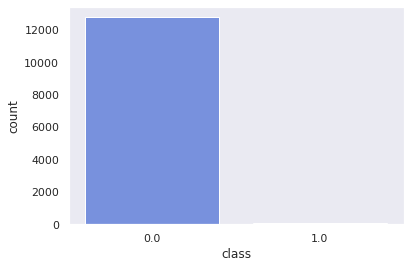

In [ ]:
sns.countplot(x='class', data=df)

In [ ]:
classes = {0: 'Não fraude', 1: 'Fraude'} # Dicionário para melhorar o entendimento da saída
df['class'].value_counts().rename(index=classes)

Não fraude    12785
Fraude           56
Name: class, dtype: int64

A variável alvo é muito desbalanceada.

## Verificando algumas distribuições em relação às classes


# v1

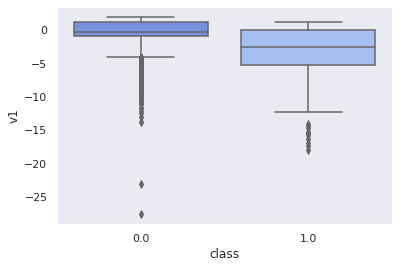

In [ ]:
sns.boxplot(data=df, y='v1', x='class')

## Vendo as correlações

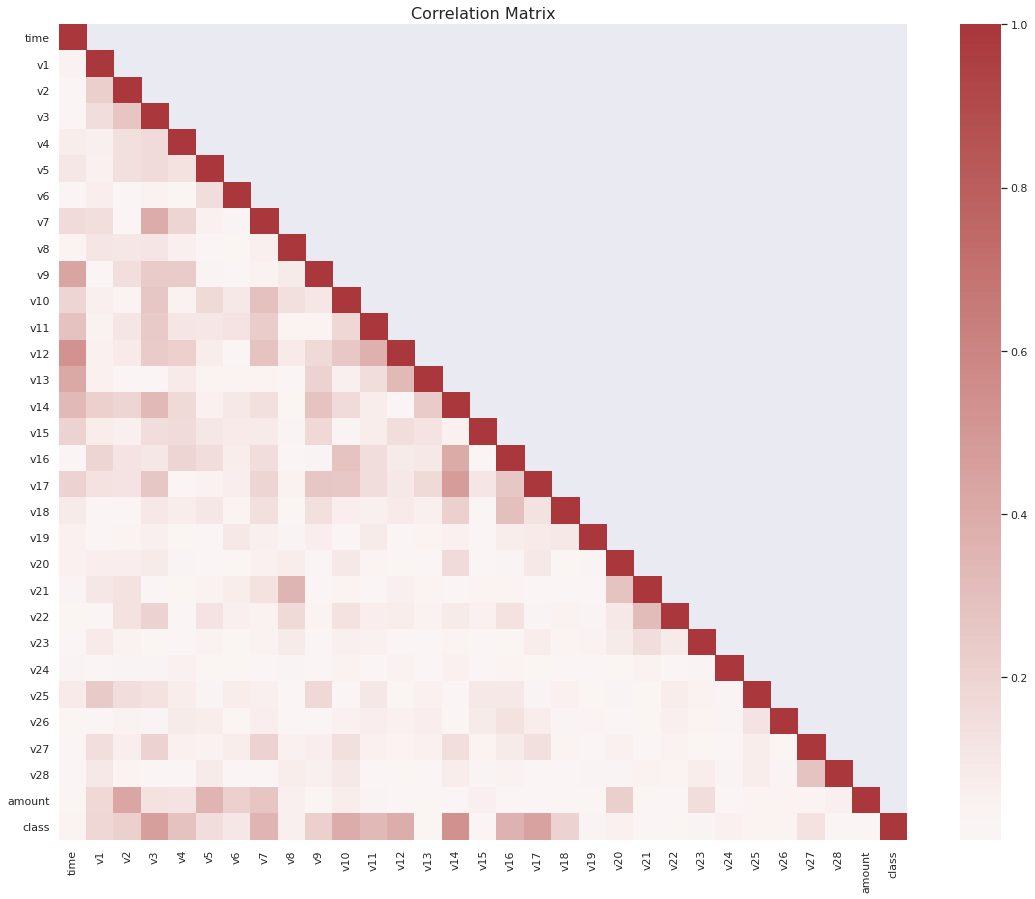

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Lista ordenada das correlações das features com class
v15       0.005310
amount    0.010767
v28       0.012064
v21       0.013311
v22       0.020873
v13       0.023561
v23       0.025369
v19       0.027781
time      0.031725
v26       0.033969
v25       0.036898
v20       0.049996
v24       0.052534
v8        0.056390
v6        0.109600
v27       0.128892
v5        0.149273
v1        0.180585
v18       0.198972
v9        0.214597
v2        0.216770
v4        0.287764
v11       0.335828
v7        0.354060
v16       0.361669
v12       0.389716
v10       0.392933
v17       0.449732
v3        0.464680
v14       0.536215
class     1.000000
Name: class, dtype: float64


['v15']

In [ ]:
dstb.show_correlations(df, 'class')

## Definindo as variáveis que serão usadas nos modelos

In [ ]:
i_folks = 10 # Número de Cross-Validations
i_seed = 20111974 # semente por questões de reproducibilidade
f_test_size = 0.3 # Proporção do dataframe de validação (outros valores poderiam ser 0.15, 0.20 ou 0.25)

## Separando o dataset em teste e treinamento

In [ ]:
X = df.drop('class', axis=1)
Y = df['class']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=f_test_size, random_state=i_seed)

## Criando o modelo baseline

In [ ]:
DT_bl = DecisionTreeClassifier(max_depth=5, min_samples_split=2, random_state=i_seed)

In [ ]:
DT_bl.fit(x_train, y_train)
dstb.do_cross_val_score(DT_bl, x_train, y_train, CV=i_cv)

Média das Acurácias calculadas pelo CV....: 99.9
std médio das Acurácias calculadas pelo CV: 0.09


array([1.        , 0.99888765, 0.99777531, 0.99777531, 1.        ,
       0.99888765, 1.        , 0.99888765, 0.99777283, 1.        ])

## Montando a matriz de confusão

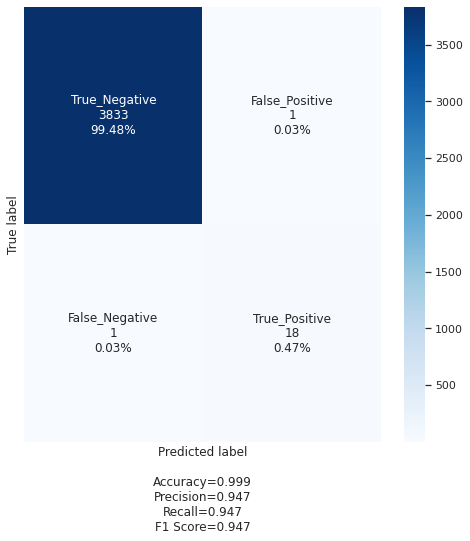

In [ ]:
y_pred = DT_bl.predict(x_test)
cf_matrix = met.confusion_matrix(y_test, y_pred)
cf_labels = ['True_Negative', 'False_Positive', 'False_Negative', 'True_Positive']
cf_categories = ['Zero', 'One']
dstb.mostra_confusion_matrix(cf_matrix, group_names=cf_labels, categories=cf_categories)